In [21]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, Birch
from  matplotlib.pyplot import scatter as sc

In [11]:
data = pd.read_csv('Mall_Customers.csv')
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
print(data.shape)
print(data.isnull().sum())

(200, 5)
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [12]:
data.columns="id male age income score".split()
data=data.set_index('id')
data['male'] = (data['male']=='Male').apply(int)
data.head()

,male,age,income,score
id,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [15]:
from sklearn import metrics
from scipy.spatial.distance import cdist

2
3
4
5
6
7
8
9
10
11
12
13
14


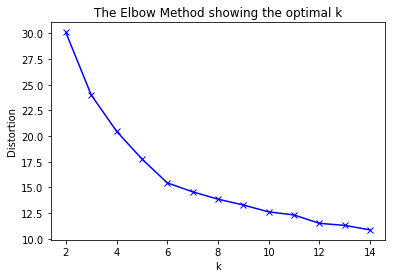

In [17]:
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])  

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [96]:
current_palette = sns.color_palette('bright', 6)
cls=KMeans(n_clusters=6)
l5=cls.fit_predict(data)


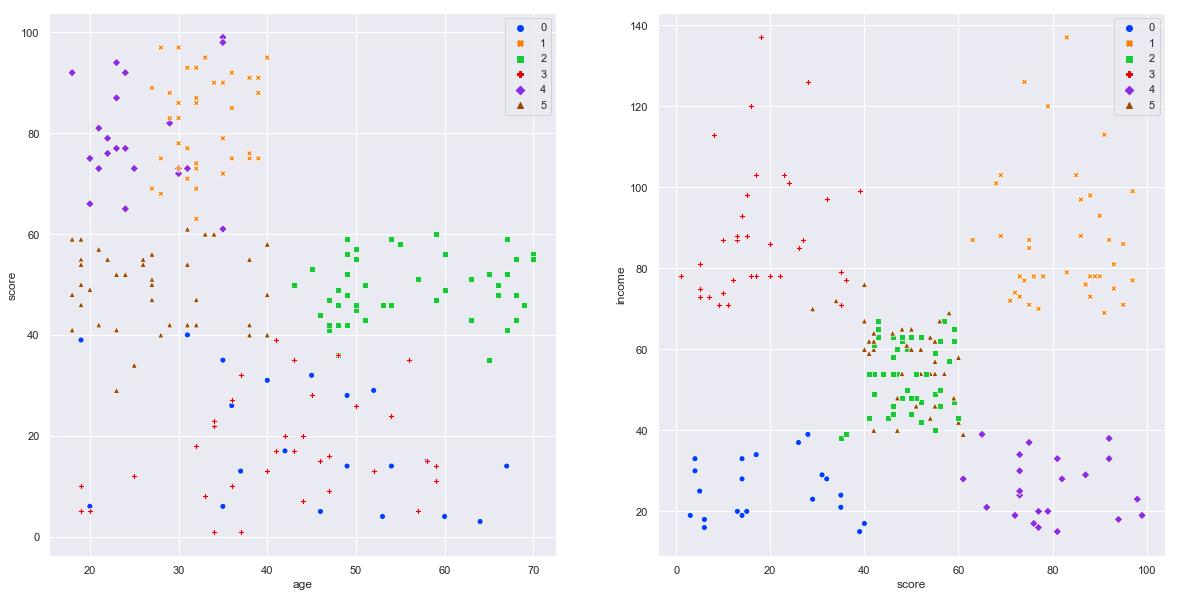

In [98]:
a = (20, 10)
fig,ax = plt.subplots(1,2,figsize=a)
sns.scatterplot(ax=ax[1],x=data['score'], y=data['income'], hue=l5, 
                legend = 'full', style=l5, palette=current_palette)
sns.scatterplot(ax=ax[0],x=data['age'], y=data['score'], hue=l5, 
                legend = 'full', style=l5, palette=current_palette);

0    35
1    38
2    39
3    45
4    22
5    21
dtype: int64


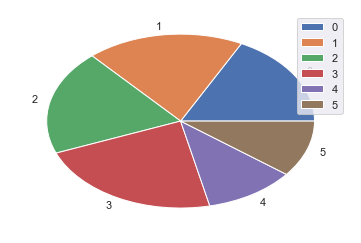

In [85]:
t=pd.Series(l5).value_counts().sort_index()
print(t)
plt.pie(t, labels =t.index )
plt.legend()

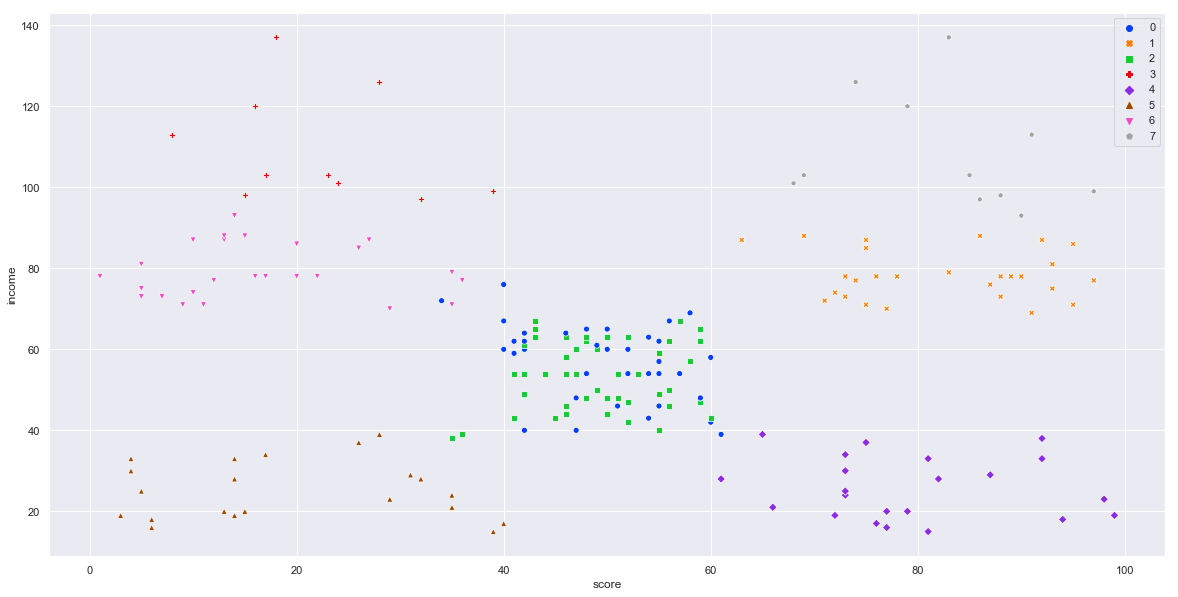

In [99]:
current_palette = sns.color_palette('bright', 8)
cls=KMeans(n_clusters=8)
l8=cls.fit_predict(data)
a = (20, 10)
fig,ax = plt.subplots(figsize=a)
sns.scatterplot(x=data['score'], y=data['income'], hue=l8, 
                legend = 'full', style=l8, palette=current_palette)


0    37
1    28
2    45
3    10
4    22
5    21
6    26
7    11
dtype: int64


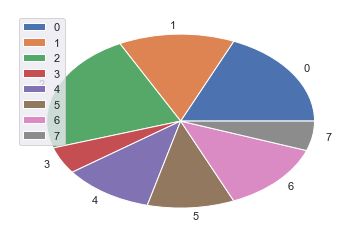

In [102]:
t=pd.Series(l8).value_counts().sort_index()
print(t)
plt.pie(t, labels =t.index )
plt.legend()

E:\Program Files\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
E:\Program Files\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\Program Files\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
E:\Program Files\anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


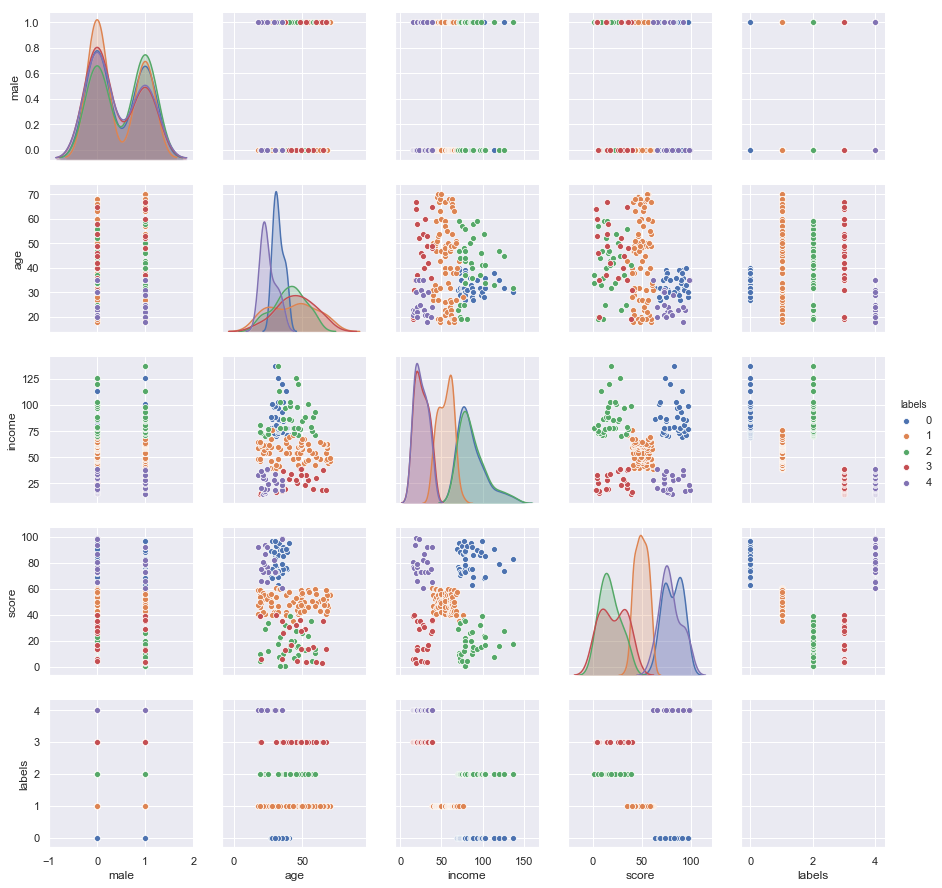

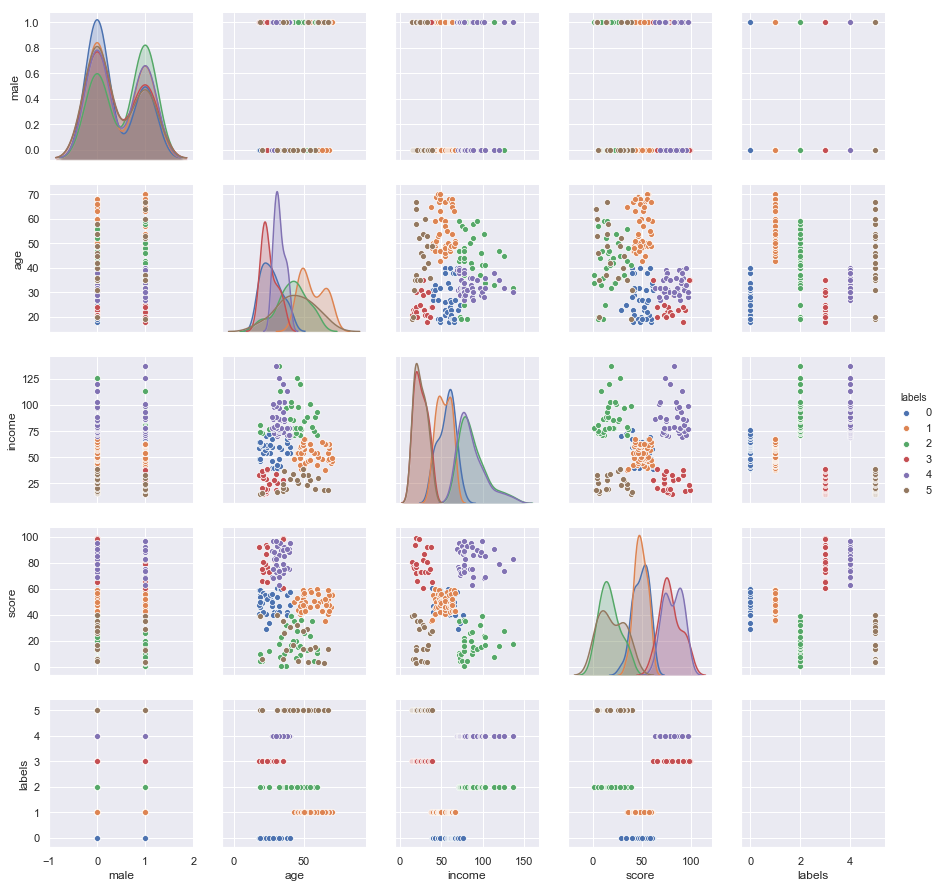

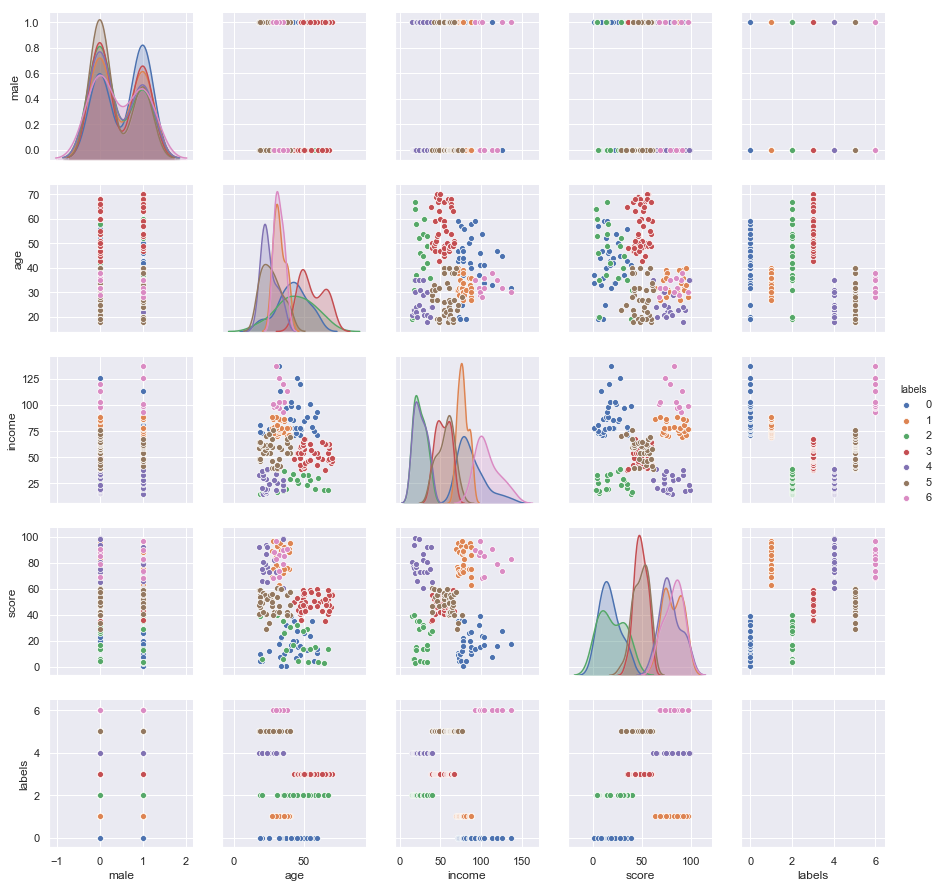

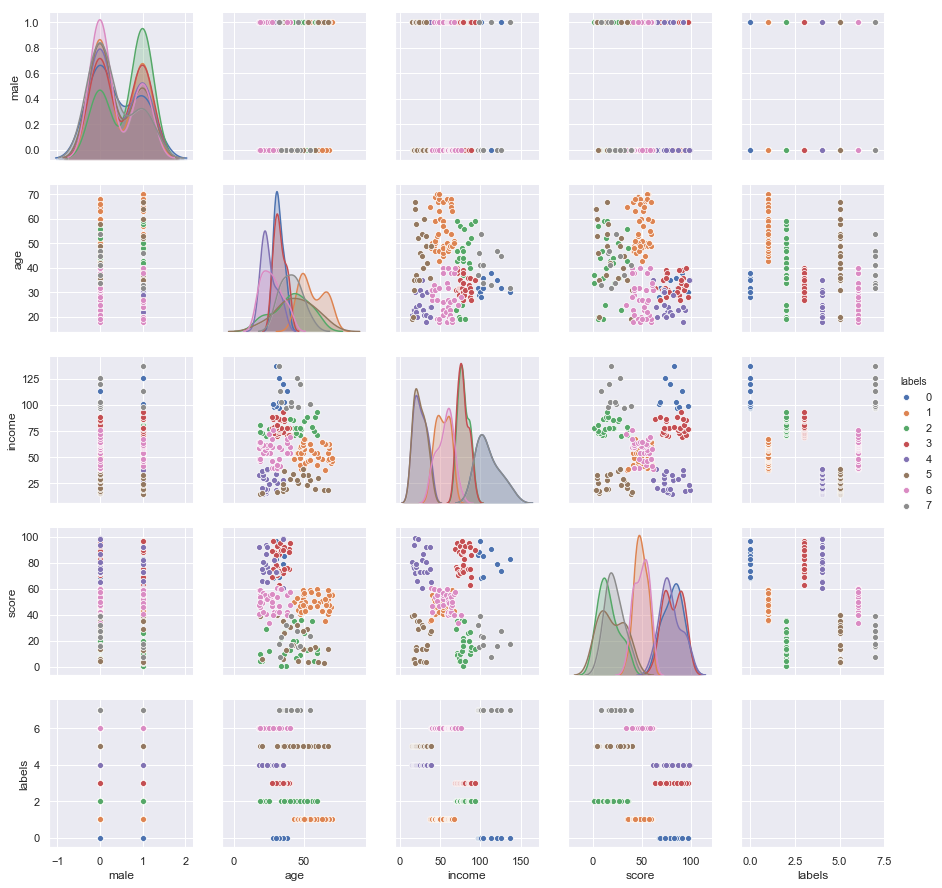

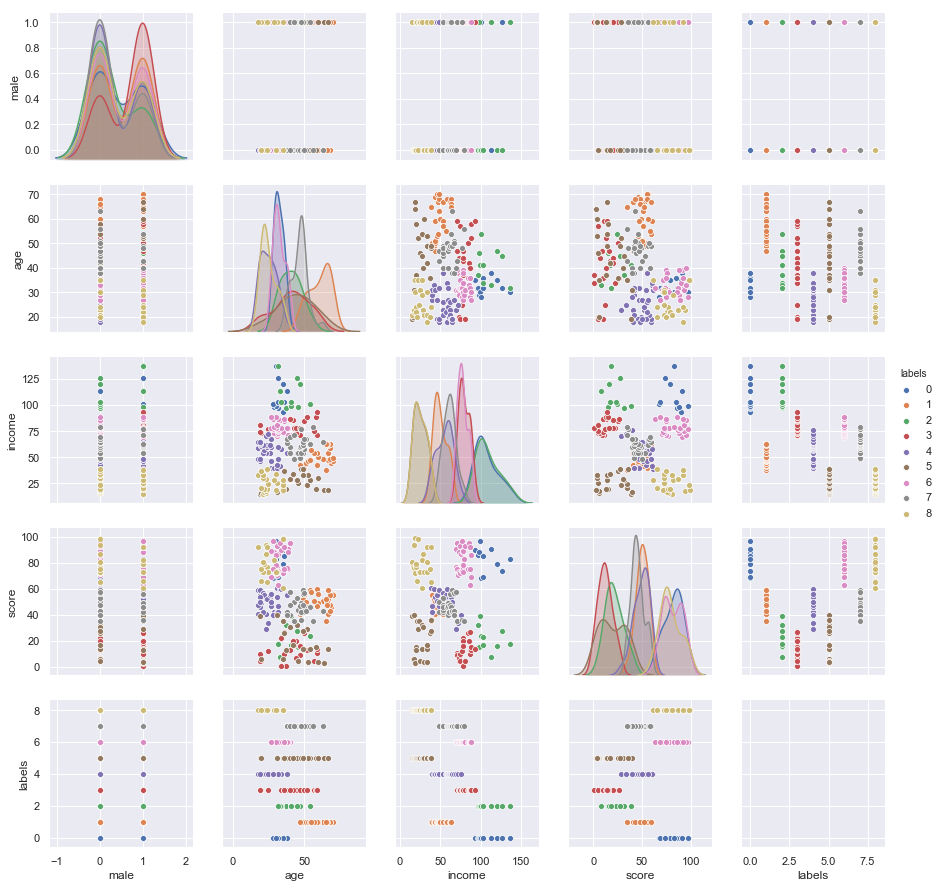

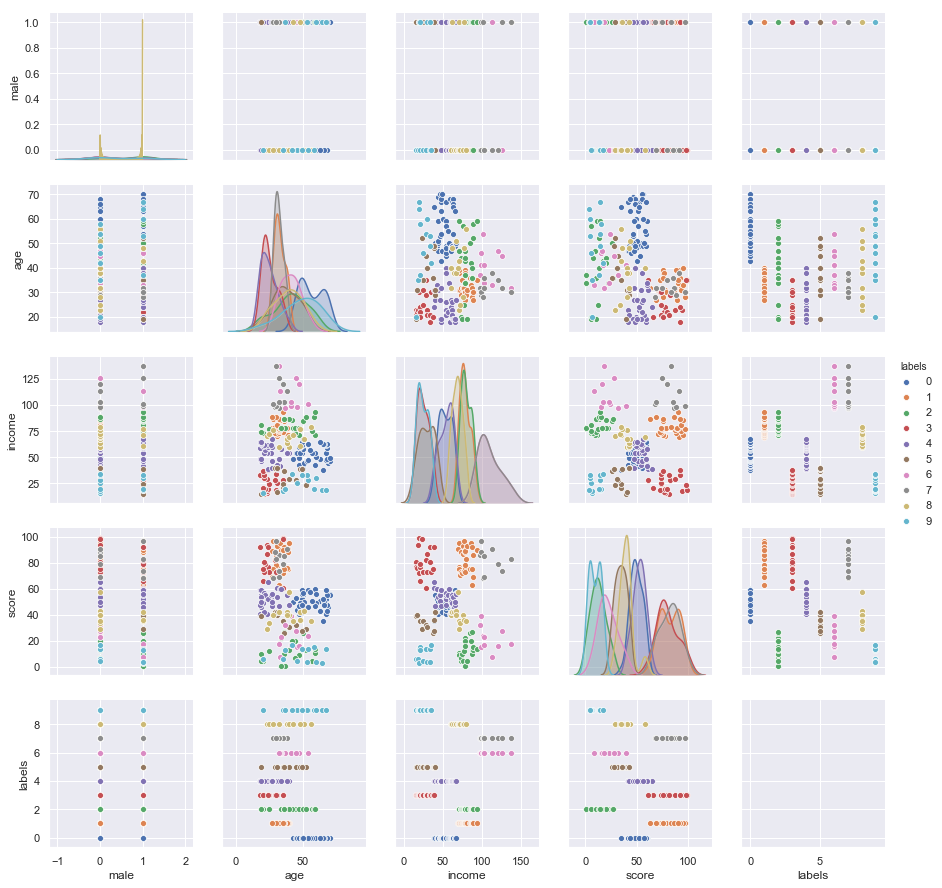

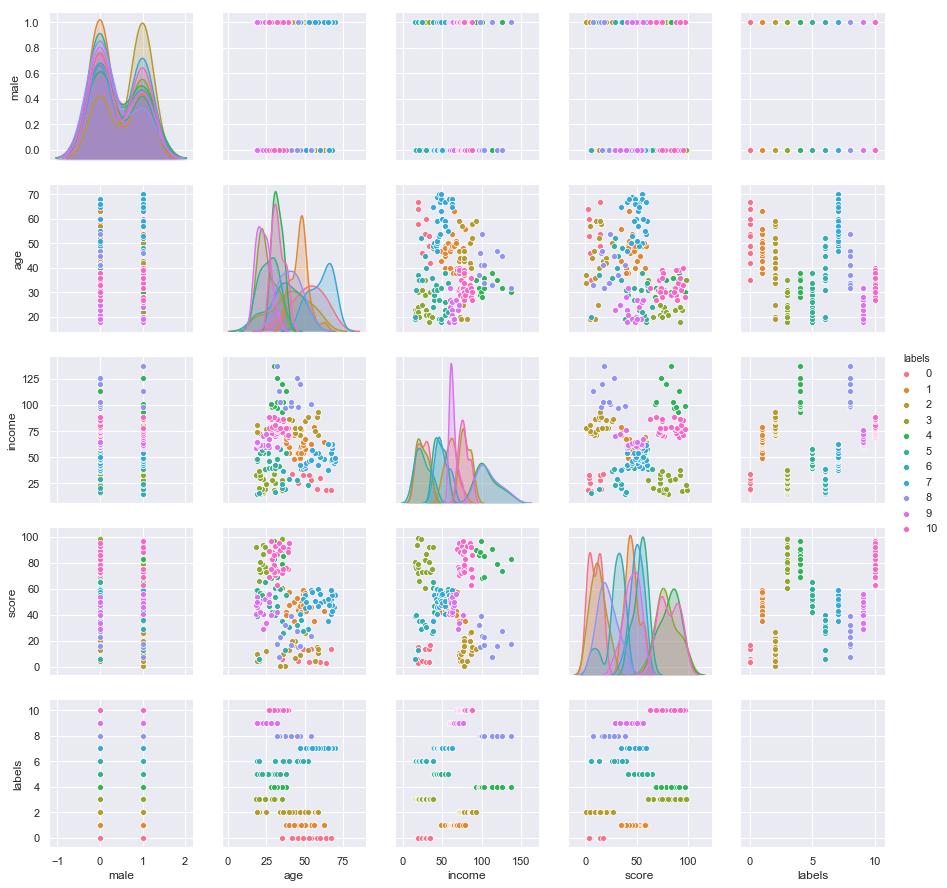

In [104]:
 for i in range(5, 12):
    cls=KMeans(n_clusters=i)
    l=cls.fit_predict(data)
    sns.pairplot(pd.concat([data,pd.Series(l,index=data.index,name='labels')],axis=1),hue='labels')